In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train = pd.get_dummies(y_train)

In [8]:
y_train = np.array(y_train)

In [9]:
y_test = pd.get_dummies(y_test)
y_test = np.array(y_test)

In [10]:
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

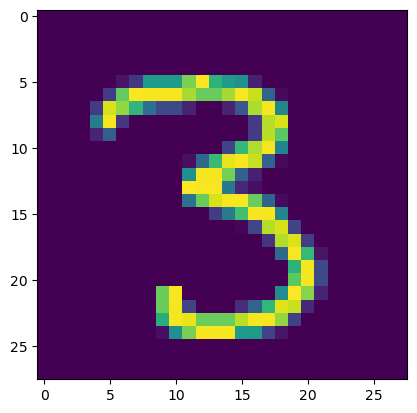

In [11]:
first_image = np.array(x_train[55050],dtype = 'float')
plt.imshow(first_image)

In [12]:
y_train[55050]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [13]:
x_train = x_train.reshape(60000,784)

In [14]:
x_train.shape

(60000, 784)

In [15]:
x_test = x_test.reshape(10000,784)

In [16]:
x_test.shape

(10000, 784)

In [17]:
n_input = 784
n_hidden1 = 256
n_hidden2 = 256
n_classes = 10

weights = {
    'h1' : tf.Variable(tf.random.normal([n_input,n_hidden1])),
    'h2' : tf.Variable(tf.random.normal([n_hidden1,n_hidden2])),
    'out' : tf.Variable(tf.random.normal([n_hidden2,n_classes]))
}
biases = {
    'h1' : tf.Variable(tf.random.normal([n_hidden1])),
    'h2' : tf.Variable(tf.random.normal([n_hidden2])),
    'out' : tf.Variable(tf.random.normal([n_classes]))
}

In [18]:
weights['h1'][0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.90160036>

In [19]:
def forward_propagation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

In [20]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
pred = forward_propagation(x_train,weights,biases)
pred_1 = forward_propagation(x_test,weights,biases) 
predictions = tf.argmax(pred,1)
predictions_test = tf.argmax(pred_1,1)
correct = tf.argmax(y_train,1)
correct_test = tf.argmax(y_test,1)

In [21]:
count = 0
for i in range(len(predictions.numpy())):
    if predictions.numpy()[i] == correct.numpy()[i]:
        count += 1
count_test = 0
for i in range(len(correct_test)):
    if predictions_test.numpy()[i] == correct_test.numpy()[i]:
        count_test+=1
count,count_test

(4259, 679)

In [22]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y_train))

In [23]:
learning_rate = 0.01
training_epochs = 10
batch_size = 100
optimizer = tf.optimizers.Adam(learning_rate)

In [24]:
# Training loop
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(x_train.shape[0] / batch_size)

    # Loop over all batches
    for i in range(total_batch):
        # Get the next batch of data
        batch_x = x_train[i * batch_size: (i + 1) * batch_size]
        batch_y = y_train[i * batch_size: (i + 1) * batch_size]

        with tf.GradientTape() as tape:
            # Forward pass
            logits = forward_propagation(batch_x, weights, biases)
            # Compute the cross-entropy loss
            current_cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=batch_y))

        # Compute gradients
        grads = tape.gradient(current_cost, list(weights.values()) + list(biases.values()))
        # Update weights and biases
        optimizer.apply_gradients(zip(grads, list(weights.values()) + list(biases.values())))

        # Compute average loss
        avg_cost += current_cost / total_batch

    # Display the cost per epoch
    print("Epoch:", (epoch + 1), "Cost:", avg_cost)

print("Training completed!")

Epoch: 1 Cost: tf.Tensor(11773.845, shape=(), dtype=float32)
Epoch: 2 Cost: tf.Tensor(2269.5322, shape=(), dtype=float32)
Epoch: 3 Cost: tf.Tensor(1257.462, shape=(), dtype=float32)
Epoch: 4 Cost: tf.Tensor(830.59406, shape=(), dtype=float32)
Epoch: 5 Cost: tf.Tensor(689.3306, shape=(), dtype=float32)
Epoch: 6 Cost: tf.Tensor(635.40076, shape=(), dtype=float32)
Epoch: 7 Cost: tf.Tensor(536.0288, shape=(), dtype=float32)
Epoch: 8 Cost: tf.Tensor(438.91147, shape=(), dtype=float32)
Epoch: 9 Cost: tf.Tensor(405.84473, shape=(), dtype=float32)
Epoch: 10 Cost: tf.Tensor(384.17496, shape=(), dtype=float32)
Training completed!


In [25]:
pred_test = forward_propagation(x_test, weights, biases)

In [26]:
y_pred_test = tf.argmax(pred_test,1)

In [27]:
y_pred_test = y_pred_test.numpy()

In [28]:
y_test = tf.argmax(y_test,1)

In [29]:
y_test = y_test.numpy()

In [30]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred_test[i]:
        count+=1

In [31]:
count

9602